In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sci
import autograd as ad
import autograd.numpy as np

In [2]:
from autograd.extend import primitive, defvjp
def annihilation(dim):
    return np.diag(np.sqrt(np.arange(1,dim)),1)
def creation(dim):
    return np.diag(np.sqrt(np.arange(1,dim)),-1)
def SNAIL_spectrum(phi_ex):
    beta = 0.15
    def U_s(phi): 
        return (-beta*np.cos(phi-phi_ex)-3*np.cos((phi)/3))
#     phi_ex = 0.4*2*np.pi
    phi_min = sci.optimize.minimize(U_s,0).x
    # potential expansion around minimum
    firstd = ad.grad(U_s)
    secondd = ad.grad(firstd)
    thirdd = ad.grad(secondd)
    fourd = ad.grad(thirdd)
    fived = ad.grad(fourd)
    sixd = ad.grad(fived)
    sevend = ad.grad(sixd)
    eightd = ad.grad(sevend)
    c2 = secondd(phi_min[0])
    c3 = thirdd(phi_min[0])/3/2
    c4 = fourd(phi_min[0])/4/3/2
    c5 = fived(phi_min[0])/5/4/3/2
    c6 = sixd(phi_min[0])/6/5/4/3/2
    c7 = sevend(phi_min[0])/7/6/5/4/3/2
    c8 = eightd(phi_min[0])/8/7/6/5/4/3/2
    
    Ej = 90*2*np.pi
    Ec = 0.177*2*np.pi
    omega_s = np.sqrt(8*c2*Ej*Ec)
    phi_zpf = np.power(2*Ec/Ej/c2,1/4)
    g2 = Ej*phi_zpf**2*c2/2
    g3 = Ej*phi_zpf**3*c3
    g4 = Ej*phi_zpf**4*c4
    g5 = Ej*phi_zpf**5*c5
    g6 = Ej*phi_zpf**6*c6
    g7 = Ej*phi_zpf**7*c7
    g8 = 2*Ej*phi_zpf**8*c8
    
    dim = 10
    s = annihilation(dim)
    sd = creation(dim)
    H = omega_s * np.matmul(sd,s)
    x2 = np.matmul(s+sd,s+sd)
    x3 = np.matmul(s+sd,x2)
    x4 = np.matmul(s+sd,x3)
    x5 = np.matmul(s+sd,x4)
    x6 = np.matmul(s+sd,x5)
    x7 = np.matmul(s+sd,x6)
    x8 = np.matmul(s+sd,x7)
    dc2 = c3*6/c2*(beta*np.cos(phi_min-phi_ex)-9/8*c2)
    H += g3*x3 + g4*x4 + g5*x5 + g6*x6 + g7*x7 + g8*x8
#     H = (omega_s * np.matmul(sd,s)
#         - Ej*(beta*sci.linalg.cosm(phi_zpf*(s+sd)+(phi_min-phi_ex)*np.identity(dim))
#         + 3*sci.linalg.cosm((phi_zpf*(s+sd)+phi_min*np.identity(dim))/3))- g2*x2)
    energy = np.linalg.eigh(H)[0]
    energy = energy-energy[0]*np.ones(len(energy))
    return energy[1],g3,g4,dc2,phi_min

# SNAIL first excited states energy v.s external flux

In [3]:
from autograd.extend import primitive, defvjp
def annihilation(dim):
    return np.diag(np.sqrt(np.arange(1,dim)),1)
def creation(dim):
    return np.diag(np.sqrt(np.arange(1,dim)),-1)
def SNAIL_spectrum(phi_ex):
    beta = 0.15
    def U_s(phi): 
        return (-beta*np.cos(phi-phi_ex)-3*np.cos((phi)/3))
#     phi_ex = 0.4*2*np.pi
    phi_min = sci.optimize.minimize(U_s,0).x
    # potential expansion around minimum
    firstd = ad.grad(U_s)
    secondd = ad.grad(firstd)
    thirdd = ad.grad(secondd)
    fourd = ad.grad(thirdd)
    fived = ad.grad(fourd)
    sixd = ad.grad(fived)
    sevend = ad.grad(sixd)
    eightd = ad.grad(sevend)
    c2 = secondd(phi_min[0])
    c3 = thirdd(phi_min[0])/3/2
    c4 = fourd(phi_min[0])/4/3/2
    c5 = fived(phi_min[0])/5/4/3/2
    c6 = sixd(phi_min[0])/6/5/4/3/2
    c7 = sevend(phi_min[0])/7/6/5/4/3/2
    c8 = eightd(phi_min[0])/8/7/6/5/4/3/2
    
    Ej = 90*2*np.pi
    Ec = 0.177*2*np.pi
    omega_s = np.sqrt(8*c2*Ej*Ec)
    phi_zpf = np.power(2*Ec/Ej/c2,1/4)
    g2 = Ej*phi_zpf**2*c2/2
    g3 = Ej*phi_zpf**3*c3
    g4 = Ej*phi_zpf**4*c4
    g5 = Ej*phi_zpf**5*c5
    g6 = Ej*phi_zpf**6*c6
    g7 = Ej*phi_zpf**7*c7
    g8 = 2*Ej*phi_zpf**8*c8
    
    g3 = 0
    g4 = 0
    g5 = 0
    g6 = 0
    g7 = 0
    g8 = 5.46253910160294e-07
    
    dim = 10
    s = annihilation(dim)
    sd = creation(dim)
    H = omega_s * np.matmul(sd,s)
    x2 = np.matmul(s+sd,s+sd)
    x3 = np.matmul(s+sd,x2)
    x4 = np.matmul(s+sd,x3)
    x5 = np.matmul(s+sd,x4)
    x6 = np.matmul(s+sd,x5)
    x7 = np.matmul(s+sd,x6)
    x8 = np.matmul(s+sd,x7)
    dc2 = c3*6/c2*(beta*np.cos(phi_min-phi_ex)-9/8*c2)
#     H += g3*x3 + g4*x4 + g5*x5 + g6*x6 + g7*x7 + g8*x8
    H = (omega_s * np.matmul(sd,s)
        - Ej*(beta*sci.linalg.cosm(phi_zpf*(s+sd)+(phi_min-phi_ex)*np.identity(dim))
        + 3*sci.linalg.cosm((phi_zpf*(s+sd)+phi_min*np.identity(dim))/3))- g2*x2)
    energy = np.linalg.eigh(H)[0]
    energy = energy-energy[0]*np.ones(len(energy))
    return energy[1],g3,g4,dc2,phi_min

In [4]:
phi_exs = np.linspace(0.0*2*np.pi,0.5*2*np.pi,100)
snail_energies = np.zeros(len(phi_exs))
g3s = np.zeros(len(phi_exs))
g4s = np.zeros(len(phi_exs))
dc2 = np.zeros(len(phi_exs))
c2 = np.zeros(len(phi_exs))
for i in range(len(phi_exs)):
    result = SNAIL_spectrum(phi_exs[i])
    snail_energies[i] = result[0]
    g3s[i] = result[1]
    g4s[i] = result[2]
    dc2[i] = result[3]
    c2[i] = result[4]

In [5]:
# beta = 0.1
# plt.plot(phi_exs/2/np.pi,c2,label = 'phi_m')
# plt.plot(phi_exs/2/np.pi,beta*np.sin(phi_exs)/(1/3+beta*np.cos(phi_exs)),label = 'approximation')
# plt.legend()

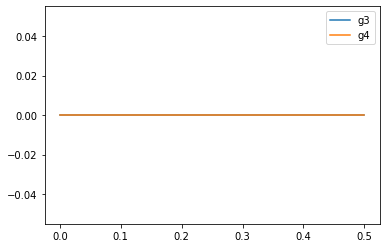

In [6]:
#g4*12?
plt.plot(phi_exs/2/np.pi,-g3s/2/np.pi,label = 'g3')
plt.plot(phi_exs/2/np.pi,-g4s/2/np.pi,label = 'g4')
plt.legend()

Text(0, 0.5, '$\\omega_s$')

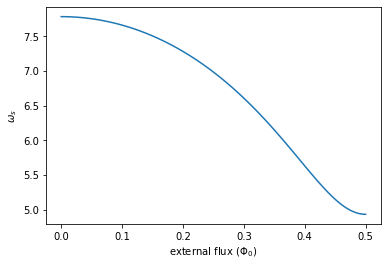

In [7]:
plt.plot(phi_exs/2/np.pi,snail_energies/2/np.pi)
plt.xlabel('external flux ($\Phi_0$)')
plt.ylabel('$\omega_s$')

$\partial E_{1}/ \partial \Phi_{ex}|_{\Phi_{ex} = 0.4\Phi_0}$ by finite difference

Text(0, 0.5, '$\\omega_s$')

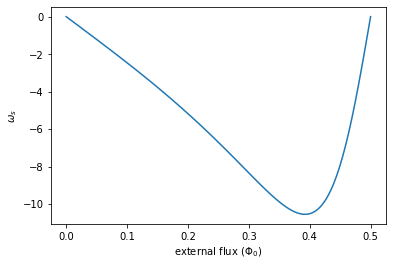

In [225]:
phi_exs = np.linspace(0*2*np.pi,0.5*2*np.pi,100)
snailE_de = np.zeros(len(phi_exs))
for i in range(len(phi_exs)):
    dphi = 1e-4
    snailE_de[i] = (SNAIL_spectrum(phi_exs[i]+dphi)[0]-SNAIL_spectrum(phi_exs[i])[0])/dphi

plt.plot(phi_exs/2/np.pi,snailE_de)
plt.xlabel('external flux ($\Phi_0$)')
plt.ylabel('$\omega_s$')

In [237]:
def coupled_spectrum(phi_ex):
    beta = 0.15
    def U_s(phi): 
#         phi_ex = 0.4*2*np.pi
        return (-beta*np.cos(phi-phi_ex)-3*np.cos((phi)/3))
    phi_min = sci.optimize.minimize(U_s,0).x
    # potential expansion around minimum
    firstd = ad.grad(U_s)
    secondd = ad.grad(firstd)
    thirdd = ad.grad(secondd)
    fourd = ad.grad(thirdd)
    fived = ad.grad(fourd)
    sixd = ad.grad(fived)
    sevend = ad.grad(sixd)
    eightd = ad.grad(sevend)
    c2 = secondd(phi_min[0])
    c3 = thirdd(phi_min[0])
    c4 = fourd(phi_min[0])
    c5 = fived(phi_min[0])
    c6 = sixd(phi_min[0])
    c7 = sevend(phi_min[0])
    c8 = eightd(phi_min[0])
    
    Ej = 90*2*np.pi
    Ec = 0.177*2*np.pi
    omega_s = np.sqrt(8*c2*Ej*Ec)
    phi_zpf = np.power(2*Ec/Ej/c2,1/4)
    g2 = Ej*phi_zpf**2*c2/2
    g3 = Ej*phi_zpf**3*c3/3/2
    g4 = Ej*phi_zpf**4*c4/4/3/2
    g5 = Ej*phi_zpf**5*c5/5/4/3/2
    g6 = Ej*phi_zpf**6*c6/6/5/4/3/2
    g7 = Ej*phi_zpf**7*c7/7/6/5/4/3/2
    g8 = 2*Ej*phi_zpf**8*c8/8/7/6/5/4/3/2
    
    g3 = 0
    g4 = 0
    g5 = 0
    g6 = 0
    g7 = 0
    g8 = 5.46253910160294e-07
    
    sdim = 10
    s = annihilation(sdim)
    sd = creation(sdim)
    Hs = omega_s * np.matmul(sd,s)
    x2 = np.matmul(s+sd,s+sd)
    x3 = np.matmul(s+sd,x2)
    x4 = np.matmul(s+sd,x3)
    x5 = np.matmul(s+sd,x4)
    x6 = np.matmul(s+sd,x5)
    x7 = np.matmul(s+sd,x6)
    x8 = np.matmul(s+sd,x7)
    Hs += g3*x3 + g4*x4 + g5*x5 + g6*x6 + g7*x7 + g8*x8
#     Hs = (omega_s * np.matmul(sd,s)
#         - Ej*(beta*sci.linalg.cosm(phi_zpf*(s+sd)+(phi_min-phi_ex)*np.identity(sdim))
#         + 3*sci.linalg.cosm((phi_zpf*(s+sd)+phi_min*np.identity(sdim))/3))- g2*x2)
    cdim = 10
    c = annihilation(sdim)
    cd = creation(sdim)
    omega_c = 1*2*np.pi
    Hc = omega_c*np.matmul(cd,c)
    delta = omega_c - omega_s
    Ic = np.identity(cdim)
    Is = np.identity(sdim)
    Hs = np.kron(Hs,np.identity(sdim))
    Hc = np.kron(Is,Hc)

    g_int = 0.1*2*np.pi/np.power(0.251,1/4)
    H_int = g_int*np.kron(c+cd,sd+s)
    H = Hs + Hc + H_int
    energy,dressed_states = np.linalg.eigh(H)
    energy = energy-energy[0]*np.ones(len(energy))
    return energy[1],g_int,delta

In [238]:
phi_exs = np.linspace(0.*2*np.pi,0.5*2*np.pi,100)
coupled_energies = np.zeros(len(phi_exs))
g_ints = np.zeros(len(phi_exs))
deltas = np.zeros(len(phi_exs))
for i in range(len(phi_exs)):
    result = coupled_spectrum(phi_exs[i])
    coupled_energies[i] = result[0]
    g_ints[i] = result[1]
    deltas[i] = result[2]

Text(0, 0.5, '$dressed E_{1,0}$')

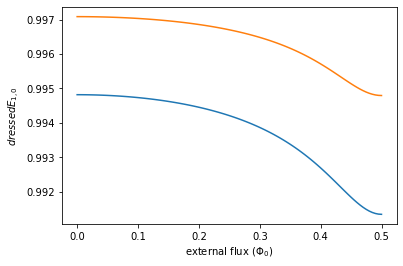

In [239]:
plt.plot(phi_exs/2/np.pi,coupled_energies/2/np.pi)
plt.plot(phi_exs/2/np.pi,np.ones(len(phi_exs))+g_ints**2/deltas/2/np.pi)
plt.xlabel('external flux ($\Phi_0$)')
plt.ylabel('$dressed E_{1,0}$')

In [240]:
phi_exs = np.linspace(0*2*np.pi,0.5*2*np.pi,100)
coupledE_de = np.zeros(len(phi_exs))
g_intsd = np.zeros(len(phi_exs))
for i in range(len(phi_exs)):
    dphi = 1e-3
    results1 = coupled_spectrum(phi_exs[i]+dphi)
    results2 = coupled_spectrum(phi_exs[i])
    coupledE_de[i] = (results1[0]-results2[0])/dphi
    g_intsd[i] = (results1[1]-results2[1])/dphi              

g independent of phi_ex

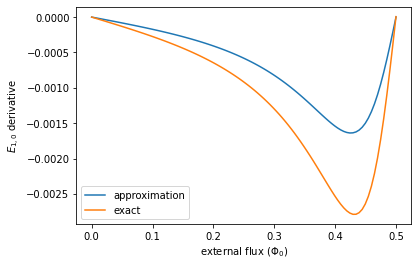

In [241]:
plt.plot(phi_exs/2/np.pi,(g_ints/deltas)**2*snailE_de/2/np.pi,label="approximation")
plt.plot(phi_exs/2/np.pi,coupledE_de/2/np.pi,label="exact")
plt.xlabel('external flux ($\Phi_0$)')
plt.ylabel('$E_{1,0}$ derivative')
plt.legend()

g depends on phi_ex

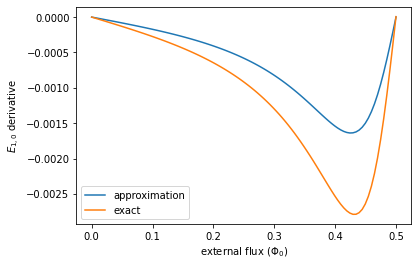

In [242]:
plt.plot(phi_exs/2/np.pi,(g_ints/deltas)**2*snailE_de/2/np.pi+2*g_ints/deltas*g_intsd/2/np.pi,label="approximation")
plt.plot(phi_exs/2/np.pi,coupledE_de/2/np.pi,label="exact")
plt.xlabel('external flux ($\Phi_0$)')
plt.ylabel('$E_{1,0}$ derivative')
plt.legend()

In [1]:
from sympy import *

In [202]:
import sympy as sp

# Define the symbol beta
beta = sp.symbols('beta')

# Define the expression
x = (-4 * sp.sqrt(1540 * beta**2 + 141) + 45) / 77

c2 = x+sp.Rational(1,3)
c4 = -x - sp.Rational(1,27)
c3 = sp.sqrt(0.6*c4*c2)
phimd = x/(x+sp.Rational(1,3))
c2d = (phimd-sp.Rational(9,8))
c3d = c4*phimd+x
c4d = (-sp.Rational(10,9)*phimd+sp.Rational(9,8))

In [203]:
c3.series(beta, 0, 12).removeO().evalf()

-160102482570.089*I*beta**10 - 313227856.306291*I*beta**8 - 684898.539302391*I*beta**6 - 1841.64701053949*I*beta**4 - 10.7089958877866*I*beta**2 + 0.0288296490407102*I

In [204]:
(c4/c2).simplify().series(beta, 0, 3).removeO().evalf().subs(beta,0.1)

0.0949385506919742

In [205]:
sp.Rational(10,9)

10/9

In [206]:
(c3d).simplify().series(beta, 0, 12).removeO().evalf().subs(beta,0.1)

-0.0721120873061228

In [207]:
der = c4d -sp.Rational(3,2)*c4/c2*c2d-104/72*(2*c3d/c2-sp.Rational(5,2)*c3**2/c2**2*c2d)

In [240]:
der.subs(beta,0.1)

2.07650745937289

In [237]:
c2d.subs(beta,0.1)

-1.36837906156693

In [257]:
ratio = sp.sqrt(-der/c2d*sp.sqrt(c2)*2*sp.sqrt(8))

In [258]:
ratio.simplify().series(beta, 0, 6).removeO().evalf()

28.5048569323912*beta**4 + 12.0967015436217*beta**2 + 1.98409232301815

In [209]:
c2d.evalf().subs(beta,0.1)

-1.36837906156693

In [242]:
+210.434737093987*beta**4+22.570644196492*beta**2+1.26863791326251

-210.434737093987*beta**4 - 22.570644196492*beta**2 - 1.26863791326251

In [250]:
13/9

1.4444444444444444

In [ ]:
1.27+22.57+210

In [265]:
(sp.sqrt(sp.sqrt(0.7**3*15))*(1.98+12.1*0.01)-2.74)/2.74

0.154840043358547